In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
from keras.models import load_model
from utils.custom_functions import *

model_name = 'Unet_180220_elu'
filename = ['0cdf5b5d0ce1_06', '0ce66b539f52_15', '0d1a9caf4350_03', '0d53224da2b7_03', 'f1eb080c7182_03']
model_path = 'models/{}.hdf5'.format(model_name)
model = load(file_name=model_name)

C:\Users\SunQ\Anaconda3\lib\site-packages\keras\models.py:291: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


In [15]:
#load image and corresponding label
index = 4

img = np.array(Image.open("inputs/train/original/{}.jpg".format(filename[index])))
label = np.array(Image.open("inputs/train_mask/original/{}_mask.gif".format(filename[index])))

In [16]:
prediction = model.predict(img[np.newaxis, :, :, :]/255)

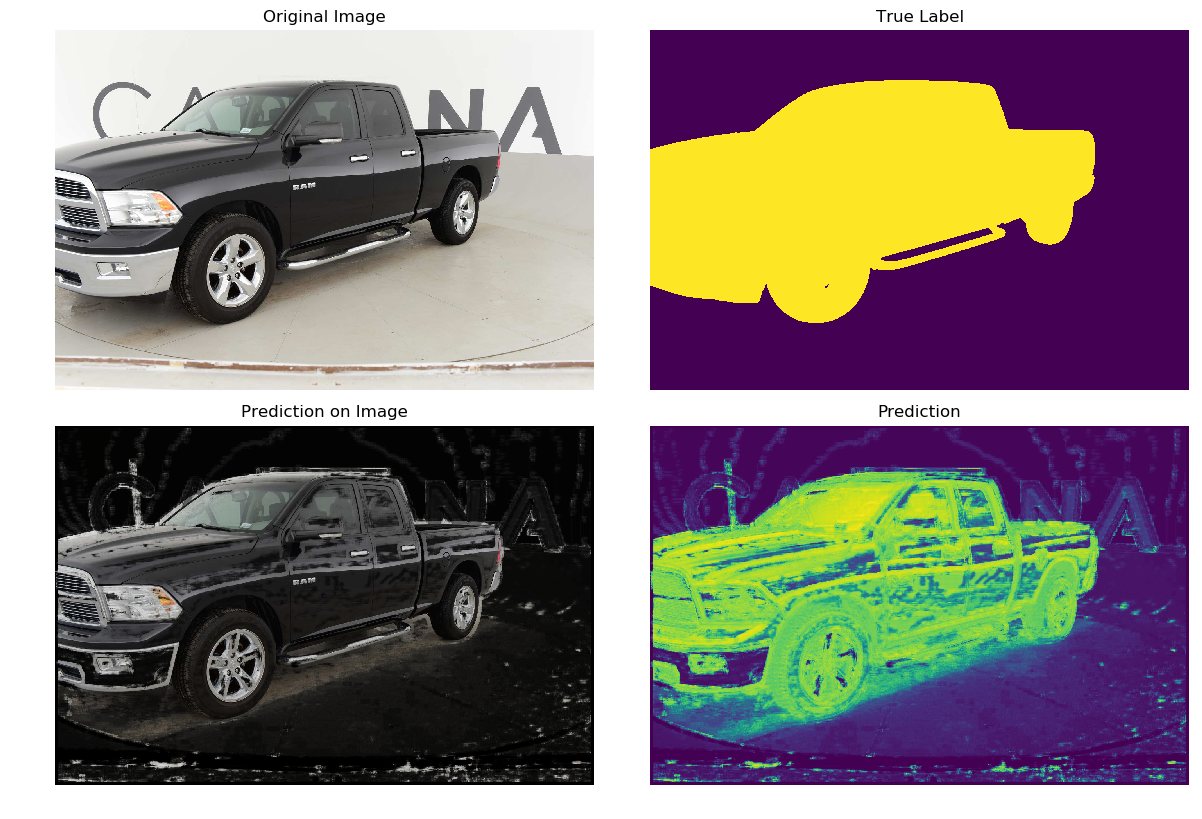

In [17]:
fig = plt.figure(figsize=(15, 10), dpi=100)
fig.subplots_adjust(hspace=0.1, wspace=0.05)
# original image
plt.subplot(221)
plt.axis('off')
plt.imshow(img)
plt.title('Original Image')

# true mask
plt.subplot(222)
plt.axis('off')
plt.imshow(label)
plt.title('True Label')

# computed prediction
plt.subplot(224)
plt.axis('off')
plt.imshow(prediction[0, :, :, 0])
plt.title('Prediction')

# computed prediction applied on image
plt.subplot(223)
plt.axis('off')
plt.imshow(img * prediction[0, :, :, :]/255)
plt.title('Prediction on Image')

plt.savefig('outputs/result_images/{}_{}.png'.format(model_name, index))